# Business Objective

Welcome to the Upvote Predictor for the Front Page of the Internet! This is a handy tool for online content creators and influencers who want to reach a wide audience across different communities on the internet. Reddit was founded in 2005 and there is a total of 330 million active users on the platform to date. Concentrated subcommunities with a particular theme/topic known as subreddits is the main driving force of the entire Reddit application. These subcommunities provide a scaffold for enriching discussions surrounding the respective niche. When a post is submitted, users can upvote or downvote the post and can even answer/comment/discuss further through multiple threads. The number of upvotes is generally well correlated with the trendiness and virality of the post. The higher the upvote score, the more likely the post will be circulated across all subscribers of the subreddit. This in turn will boost the overall reputation of the account, which is measured in "karma".

It is therefore not surprising to see many users associate a high karma with the validity of posted content and opinions. In fact, there is actually quite a handful of online websites that sell and trade Reddit accounts with high karma and age in exchange for a decent amount of money. [Here](https://upvotes4reddit.com/buy-reddit-accounts) is a good example of such a marketplace and there is even an [article](https://medium.com/@Rob79/what-i-learned-selling-my-reddit-accounts-c5e9f6348005) that talks about the process of selling an account. With so many options out there and very little credibility for whether the Reddit accounts being sold are actually the real deal, the problem boils down to saving time for potential buyers--in this case, online content creators and influencers wanting to gain more traction in online communities--and allowing them to have full control over their own accounts. The solution? A predictor tool that will output the correct upvote score range for a potential post in the form of text content. The demand for being authentic and reliable on social media is high and so bringing such a product to market is expected to have a huge return in terms of traffic and profit.

# Data Exploration and Visualization

AskReddit subreddit user-generated data from within the past 3 years were obtained from the [Pushshift Reddit API](https://github.com/pushshift/api) for a total of 60,000 entries (there is a 1000 entry limit per API call). Each API call generates a json file containing the post details. The 'title' (containing the main body of the post) and 'score' (containing the total upvote score) fields are of particular interest for this project.

In [1]:
import json

In [2]:
# Consolidate all json files into one dictionary
finaljson = {}
finaljson['data'] = []
for i in range(1,61):
    with open('pushshift{}.json'.format(i)) as json_file:
        json_data = json.load(json_file)
    finaljson['data'] = finaljson['data'] + json_data['data']

In [3]:
# Access all 60000 entries
data = finaljson['data']

As seen above, each entry is a dictionary that contains multiple keys. We will extract the 'title' key containing the post content as feature X and the 'score' key containing the upvote score as label y for each of the 60,000 entires. Both X and y will require a bit of preprocessing as shown below.

In [ ]:
Xi = [row['title'] for row in data]

The AskReddit subreddit requires a post submission to include a question mark. The following removes all occurences of '?' from each document.

In [ ]:
X = [element.replace('?','') for element in Xi]

The histogram plot below shows how the upvote scores are distributed.

In [24]:
yi = [row['score'] for row in data]

In [8]:
import matplotlib.pyplot as plt

Text(0,0.5,'Count')

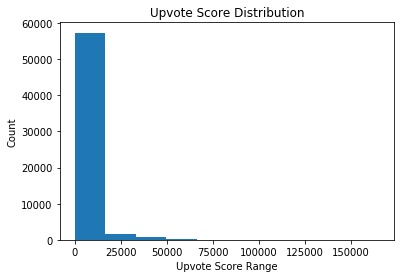

In [25]:
plt.hist(yi)
plt.title('Upvote Score Distribution')
plt.xlabel('Upvote Score Range')
plt.ylabel('Count')

The distribution appears to be skewed so we will normalize it by taking the natural log of the upvote score and plot the resulting histogram.

In [23]:
import numpy as np

In [26]:
yn = [np.log(element) for element in yi]

Text(0,0.5,'Count')

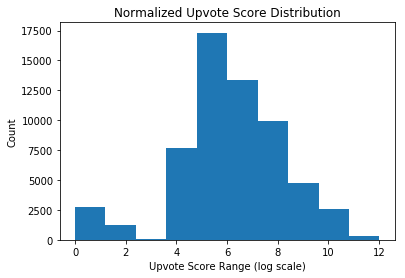

In [27]:
plt.hist(yn)
plt.title('Normalized Upvote Score Distribution')
plt.xlabel('Upvote Score Range (log scale)')
plt.ylabel('Count')

Since we will be classifying text into different ranges, it makes sense to define categories that will allow users to know how popular the post will be. For example, there can be three categories representing low, medium, and high scores. Due to the distribution for this specific dataset, four categories will be used to indicate how well the post will perform: 1. poor (0-3), 2. good (3-6), 3. very good (6-9), and 4. excellent (9-12). Each element in 'yn' will be scaled and grouped according to this metric as follows.

In [28]:
y = [int(element/4) for element in yn]

# Predictive Model

A bag-of-words approach utilizing scikit-learn will be used to build a predictive model. The pipeline will contain a TfidfVectorizer (CountVectorizer combined with a TfidfTransformer) using 5000 features of single grams and a Multinomial Naive Bayes classifier. The data will also be shuffled and split into a train and test set beforehand.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=123456) # set seed for reproducibility

In [42]:
pipe = Pipeline([('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,1), max_df=0.95, min_df=0.01)), ('nb', MultinomialNB())])

In [43]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.95, max_features=5000,
                                 min_df=0.01, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [44]:
pipe.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
pipe.score(X_test,y_test)

0.7538333333333334

The results show that the trained classifier using a Naive Bayes Multinomial model is 75.38% accurate at making predictions for the incoming body of text. It is important to take into consideration that language can be used differently across all users on a global scale such as syntax and word choice though this process will already provide users with a pretty good sense of what to expect with their potential content.